In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

# Pour les tracés
from mglearn.plot_interactive_tree import plot_tree_partition
from mglearn.plot_2d_separator import plot_2d_separator
from mglearn.tools import discrete_scatter

In [8]:
# On utilise un jeu de donnée de sklearn qui génère des points selon une forme de demi-cercle
X, y = make_moons(n_samples=100, noise=0.25)

In [9]:
# L'option stratify permet de conserver la même proportion de y dans chaque fold
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [10]:
# On customise le nombre d'estimateurs qu'on veut que notre bagging utilise
model = BaggingClassifier(n_estimators=5)

In [11]:
model.fit(X_train, y_train)

BaggingClassifier(n_estimators=5)

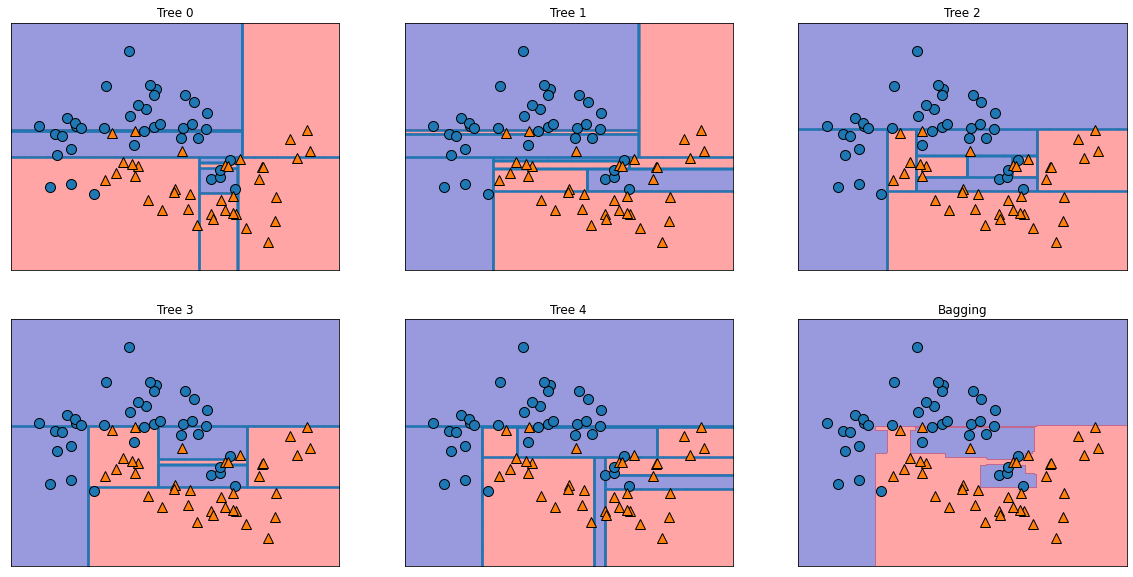

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), model.estimators_)):
    ax.set_title("Tree {}".format(i))
    plot_tree_partition(X_train, y_train, tree, ax=ax)
plot_2d_separator(model, X_train, fill=True, ax=axes[-1, -1],
                  alpha=.4)
axes[-1, -1].set_title("Bagging")
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)